In [1]:
import spotipy
import spotipy.oauth2 as oauth2

credentials = oauth2.SpotifyClientCredentials(
        client_id='c0b6be8fb955421482e7fdf08eddda13',
        client_secret='a3d0ddcf322f4a0ea3d759c4bf3f7a45')

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [2]:
album_uris = ['spotify:album:4Uv86qWpGTxf7fU7lG5X6F', 
              'spotify:album:5ll74bqtkcXlKE7wwkMq4g', 
              'spotify:album:5fPglEDz9YEwRgbLRvhCZy', 
              'spotify:album:3WFTGIO6E3Xh4paEOBY9OU', 
              'spotify:album:20r762YmB5HeofjMCiPMLv', 
              'spotify:album:7D2NdGvBHIavgLhmcwhluK', 
              'spotify:album:7gsWAHLeT0w7es6FofOXk1', 
              'spotify:album:2Ek1q2haOnxVqhvVKqMvJe']
album_titles = ['College Dropout', 'Late Registration', 'Graduation', '808s & Heartbreak', 
                'My Beautiful Dark Twisted Fantasy', 'Yeezus', 'The Life of Pablo', 'ye']

albums = {'CD':'spotify:album:4Uv86qWpGTxf7fU7lG5X6F',
              'LR':'spotify:album:5ll74bqtkcXlKE7wwkMq4g', 
              'Graduation':'spotify:album:5fPglEDz9YEwRgbLRvhCZy', 
              '808':'spotify:album:3WFTGIO6E3Xh4paEOBY9OU',
              'MBDTF':'spotify:album:20r762YmB5HeofjMCiPMLv', 
              'Yeezus':'spotify:album:7D2NdGvBHIavgLhmcwhluK', 
              'TLOP':'spotify:album:7gsWAHLeT0w7es6FofOXk1', 
              'ye':'spotify:album:2Ek1q2haOnxVqhvVKqMvJe'}



In [3]:
import numpy as np
def get_album_features(album_uri, feature):
    track_uris = []
    results = spotify.album_tracks(album_uri)
    tracks = results['items']
    while results['next']:
        results = spotify.next(results)
        albums.extend(results['items'])
    for track in tracks:
        track_uris.append(track['uri'])  
    scores = []
    for uri in track_uris:
        results = spotify.audio_features(uri)
        if(feature == 'valence'):
            scores.append(results[0]['valence']) 
        elif(feature == 'danceability'):
            scores.append(results[0]['danceability']) 
        elif(feature == 'energy'):
            scores.append(results[0]['energy']) 
        elif(feature == 'speechiness'):
            scores.append(results[0]['speechiness']) 
        else: 
            return
    return np.mean(scores)

In [4]:
def get_all_albums_features(uris, feature):
    features = []
    for uri in uris:
        this_feature = get_album_features(uri, feature)
        features.append(this_feature)
    return features

In [5]:
valence_means = get_all_albums_features(album_uris, 'valence')

In [6]:
dance_means = get_all_albums_features(album_uris, 'danceability')

In [7]:
energy_means = get_all_albums_features(album_uris, 'energy')

In [8]:
speech_means = get_all_albums_features(album_uris, 'speechiness')

<function matplotlib.pyplot.show(*args, **kw)>

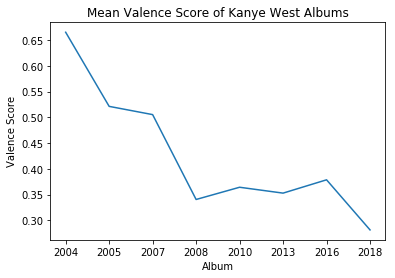

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(valence_means)
plt.xlabel('Album')
plt.xticks(np.arange(8),('2004', '2005', '2007', '2008', 
                '2010', '2013', '2016', '2018'))
plt.ylabel('Valence Score')
plt.title('Mean Valence Score of Kanye West Albums')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

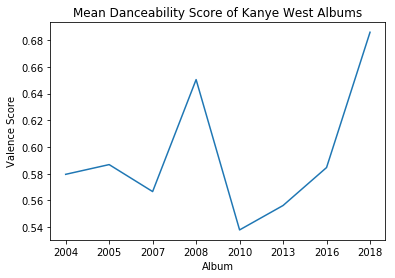

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dance_means)
plt.xlabel('Album')
plt.xticks(np.arange(8),('2004', '2005', '2007', '2008', 
                '2010', '2013', '2016', '2018'))
plt.ylabel('Valence Score')
plt.title('Mean Danceability Score of Kanye West Albums')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

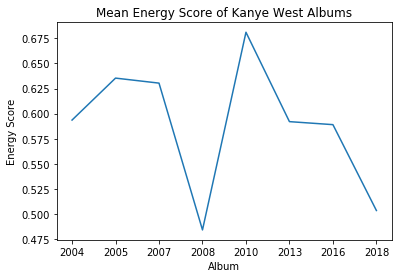

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(energy_means)
plt.xlabel('Album')
plt.xticks(np.arange(8),('2004', '2005', '2007', '2008', 
                '2010', '2013', '2016', '2018'))
plt.ylabel('Energy Score')
plt.title('Mean Energy Score of Kanye West Albums')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

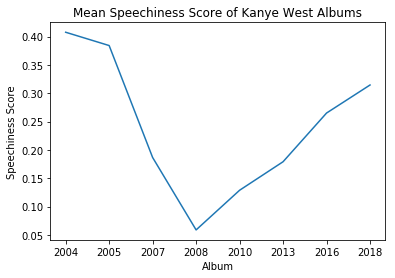

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(speech_means)
plt.xlabel('Album')
plt.xticks(np.arange(8),('2004', '2005', '2007', '2008', 
                '2010', '2013', '2016', '2018'))
plt.ylabel('Speechiness Score')
plt.title('Mean Speechiness Score of Kanye West Albums')
plt.show

In [14]:
def get_tracks_feature(album_uri, feature):
    track_uris = []
    results = spotify.album_tracks(album_uri)
    tracks = results['items']
    while results['next']:
        results = spotify.next(results)
        albums.extend(results['items'])
    for track in tracks:
        track_uris.append(track['uri'])  
    scores = []
    for uri in track_uris:
        results = spotify.audio_features(uri)
        if(feature == 'valence'):
            scores.append(results[0]['valence']) 
        elif(feature == 'danceability'):
            scores.append(results[0]['danceability']) 
        elif(feature == 'energy'):
            scores.append(results[0]['energy']) 
        elif(feature == 'speechiness'):
            scores.append(results[0]['speechiness']) 
        else: 
            return
    return scores

In [15]:
def get_all_tracks_features(uris, feature):
    features = []
    index = []
    i = 0
    for uri in uris:
        songs = get_tracks_feature(uri, feature)
        for song in songs:
            features.append(song)
            index.append(i)
        i += 1
    return [[index],[features]]

In [17]:
all_tracks_valence = get_all_tracks_features(album_uris, 'valence')

In [210]:
print(all_tracks_valence)

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7]], [[0.463, 0.647, 0.869, 0.434, 0.564, 0.657, 0.715, 0.643, 0.649, 0.772, 0.646, 0.611, 0.924, 0.642, 0.592, 0.83, 0.741, 0.446, 0.66, 0.606, 0.854, 0.634, 0.569, 0.545, 0.66, 0.84, 0.476, 0.758, 0.58, 0.45, 0.392, 0.536, 0.94, 0.471, 0.224, 0.533, 0.375, 0.374, 0.138, 0.332, 0.512, 0.605, 0.515, 0.723, 0.49, 0.124, 0.487, 0.102, 0.704, 0.299, 0.43, 0.765, 0.708, 0.918, 0.302, 0.313, 0.0734, 0.617, 0.483, 0.123, 0.545, 0.376, 0.441, 0.173, 0.158, 0.473, 0.31, 0.367, 0.12, 0.577, 0.497, 0.221, 0.0964, 0.58, 0.205, 0.109, 0.452, 0.636, 0.277, 0.597, 0.497, 0.273, 0.294, 0.329, 0.0399, 0.45, 0.364, 0.589, 0.404, 0.288, 0.36, 0.449, 0.285, 0.

<function matplotlib.pyplot.show(*args, **kw)>

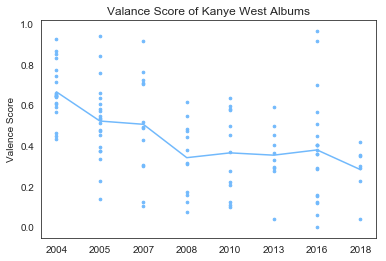

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(all_tracks_valence[0], all_tracks_valence[1], s=7)
plt.xticks(np.arange(8),('2004', '2005', '2007', '2008', 
                '2010', '2013', '2016', '2018'))
plt.plot(valence_means)
plt.ylabel('Valence Score')
plt.title('Valance Score of Kanye West Albums')
plt.show

In [22]:
all_tracks_speechiness = get_all_tracks_features(album_uris, 'speechiness')

<function matplotlib.pyplot.show(*args, **kw)>

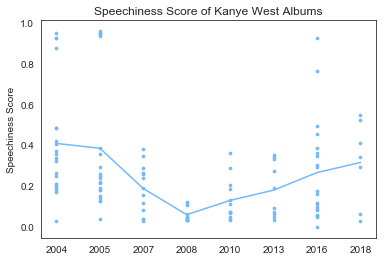

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(all_tracks_speechiness[0], all_tracks_speechiness[1], s=7)
plt.xticks(np.arange(8),('2004', '2005', '2007', '2008', 
                '2010', '2013', '2016', '2018'))
plt.plot(speech_means)
plt.ylabel('Speechiness Score')
plt.title('Speechiness Score of Kanye West Albums')
plt.show

In [26]:
import pandas as pd
spotify.trace=False 
playlist = spotify.user_playlist("wazowshki", "spotify:user:wazowshki:playlist:4GUDdxwVV0BEQn8gxNsnMH") 
songs = playlist["tracks"]["items"] 
ids = [] 
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = spotify.audio_features(ids) 
df_even = pd.DataFrame(features)

In [253]:
##LEFTOVER
import pandas as pd
spotify.trace=False 
playlist2 = spotify.user_playlist("wazowshki", "spotify:user:wazowshki:playlist:6jIj11oHSQB4Q89tc13PpH")
songs2 = playlist2["tracks"]["items"] 
ids2 = [] 
for i in range(len(songs2)): 
    ids2.append(songs2[i]["track"]["id"]) 
features2 = spotify.audio_features(ids2) 
df2 = pd.DataFrame(features2)


df2.rename(index={0:100,1:101}, inplace=True)
df2.rename(index={2:102,3:103}, inplace=True)
df2.rename(index={4:104,5:105,6:106,7:107,8:108,9:109,10:110,11:111,12:112,13:113}, inplace=True)
df2.rename(index={14:114,15:115,16:116}, inplace=True)

df_all = pd.concat([df, df2])

i = 0 
bin = []
while(i < 117):
    if(i<67):
        bin.append(0);
    else:
        bin.append(1)
    i+=1



In [29]:
x = 0 
bin2 = []
while(x < 101):
    if(x<51):
        bin2.append(0);
    else:
        bin2.append(1)
    x+=1

In [30]:
age = np.array(bin2)

In [31]:
ser = pd.Series(age)

In [32]:
df_even = df_even.assign(age=ser)

In [33]:
##FINAL DATA Structure
df_even

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,age
0,0.01420,https://api.spotify.com/v1/audio-analysis/0IW0...,0.595,239880,0.754,0IW0qaeyxL5Et4UG2MrJKB,0.000000,11,0.2470,-5.827,0,0.1810,83.155,4,https://api.spotify.com/v1/tracks/0IW0qaeyxL5E...,audio_features,spotify:track:0IW0qaeyxL5Et4UG2MrJKB,0.6470,0
1,0.14900,https://api.spotify.com/v1/audio-analysis/5SkR...,0.657,223507,0.734,5SkRLpaGtvYPhw02vZhQQ9,0.000000,8,0.1390,-4.832,0,0.4840,91.030,4,https://api.spotify.com/v1/tracks/5SkRLpaGtvYP...,audio_features,spotify:track:5SkRLpaGtvYPhw02vZhQQ9,0.4340,0
2,0.50300,https://api.spotify.com/v1/audio-analysis/1ko2...,0.507,324227,0.753,1ko2NuvWlQdxtNRc8QQzmT,0.000000,5,0.5730,-5.310,0,0.1900,178.068,3,https://api.spotify.com/v1/tracks/1ko2NuvWlQdx...,audio_features,spotify:track:1ko2NuvWlQdxtNRc8QQzmT,0.6570,0
3,0.61400,https://api.spotify.com/v1/audio-analysis/5g1v...,0.637,193733,0.834,5g1vtHqi9uV7xtYeCcFOBx,0.000000,3,0.3170,-4.686,0,0.3230,87.312,4,https://api.spotify.com/v1/tracks/5g1vtHqi9uV7...,audio_features,spotify:track:5g1vtHqi9uV7xtYeCcFOBx,0.7150,0
4,0.42300,https://api.spotify.com/v1/audio-analysis/34j4...,0.459,324440,0.816,34j4OxJxKznBs88cjSL2j9,0.000000,11,0.1690,-4.872,0,0.4030,80.293,4,https://api.spotify.com/v1/tracks/34j4OxJxKznB...,audio_features,spotify:track:34j4OxJxKznBs88cjSL2j9,0.6430,0
5,0.18400,https://api.spotify.com/v1/audio-analysis/5b2F...,0.614,289493,0.644,5b2FFKC64kxqcfaFnIZxoM,0.000000,11,0.4890,-5.672,0,0.3730,84.788,4,https://api.spotify.com/v1/tracks/5b2FFKC64kxq...,audio_features,spotify:track:5b2FFKC64kxqcfaFnIZxoM,0.6490,0
6,0.78500,https://api.spotify.com/v1/audio-analysis/2a1J...,0.715,46173,0.288,2a1JSfTePKhysdIif2bzut,0.000000,1,0.6880,-13.843,1,0.9250,115.114,4,https://api.spotify.com/v1/tracks/2a1JSfTePKhy...,audio_features,spotify:track:2a1JSfTePKhysdIif2bzut,0.7720,0
7,0.00981,https://api.spotify.com/v1/audio-analysis/1Vp4...,0.704,322800,0.792,1Vp4St7JcXaUoJcIahtf3L,0.000000,2,0.3650,-4.831,1,0.1980,118.022,4,https://api.spotify.com/v1/tracks/1Vp4St7JcXaU...,audio_features,spotify:track:1Vp4St7JcXaUoJcIahtf3L,0.6460,0
8,0.31400,https://api.spotify.com/v1/audio-analysis/3A4c...,0.559,316053,0.733,3A4cpTBPaIQdtPFb5JxtaX,0.000000,2,0.2840,-5.659,0,0.1710,145.115,4,https://api.spotify.com/v1/tracks/3A4cpTBPaIQd...,audio_features,spotify:track:3A4cpTBPaIQdtPFb5JxtaX,0.6110,0
9,0.34100,https://api.spotify.com/v1/audio-analysis/4KFY...,0.636,246933,0.700,4KFY4EEv9CN6ivrzD6vEvg,0.000000,1,0.1610,-3.099,0,0.4210,88.817,4,https://api.spotify.com/v1/tracks/4KFY4EEv9CN6...,audio_features,spotify:track:4KFY4EEv9CN6ivrzD6vEvg,0.9240,0


In [38]:
import seaborn as sns
colors = ["#71B9FC","#EF5B5B"]
palette = sns.color_palette(colors)
sns.set_palette(palette)
sns.set_style("white")

In [35]:
#OLD = 0, NEW = 1
old_tempo = df_even[df_even['age'] ==0]['tempo']
new_tempo = df_even[df_even['age'] ==1]['tempo']
old_acoust = df_even[df_even['age'] ==0]['acousticness']
new_acoust = df_even[df_even['age'] ==1]['acousticness']
old_dance = df_even[df_even['age'] ==0]['danceability']
new_dance = df_even[df_even['age'] ==1]['danceability']
old_inst = df_even[df_even['age'] ==0]['instrumentalness']
new_inst = df_even[df_even['age'] ==1]['instrumentalness']
old_live = df_even[df_even['age'] ==0]['liveness']
new_live = df_even[df_even['age'] ==1]['liveness']
old_speech = df_even[df_even['age'] ==0]['speechiness']
new_speech = df_even[df_even['age'] ==1]['speechiness']
old_valence = df_even[df_even['age'] ==0]['valence']
new_valence = df_even[df_even['age'] ==1]['valence']
old_energy = df_even[df_even['age'] ==0]['energy']
new_energy = df_even[df_even['age'] ==1]['energy']

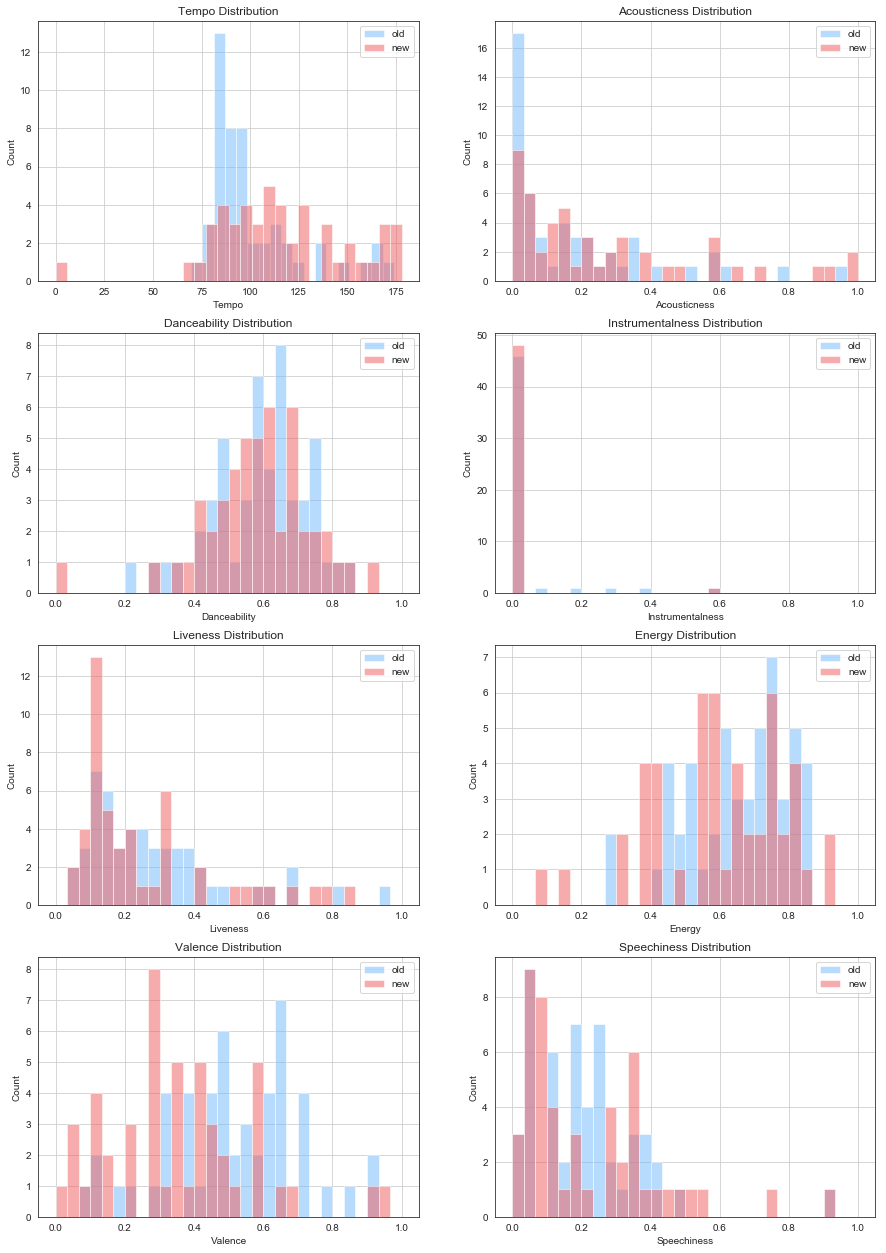

In [39]:
grid = plt.figure(figsize=(15,22))

#TEMPO
ax1 = grid.add_subplot(421)
ax1.set_xlabel("Tempo")
ax1.set_ylabel("Count")
ax1.set_title("Tempo Distribution")
old_tempo.hist(alpha=0.5,bins=30,label='old', range=(0,174))
ax2 = grid.add_subplot(421)
new_tempo.hist(alpha=0.5,bins=30,label='new')
ax1.legend(loc="upper right")

#ACOUSTICNESS
ax3 = grid.add_subplot(422)
ax3.set_xlabel("Acousticness")
ax3.set_ylabel("Count")
ax3.set_title("Acousticness Distribution")
old_acoust.hist(alpha=0.5,bins=30,label='old', range=(0,1))
ax4 = grid.add_subplot(422)
new_acoust.hist(alpha=0.5,bins=30,label='new', range=(0,1))
ax4.legend(loc="upper right")

#Dance
ax5 = grid.add_subplot(423)
ax5.set_xlabel("Danceability")
ax5.set_ylabel("Count")
ax5.set_title("Danceability Distribution")
old_dance.hist(alpha=0.5,bins=30,label='old', range=(0,1))
ax6 = grid.add_subplot(423)
new_dance.hist(alpha=0.5,bins=30,label='new', range=(0,1))
ax5.legend(loc="upper right")

#Instrumentalness
ax7 = grid.add_subplot(424)
ax7.set_xlabel("Instrumentalness")
ax7.set_ylabel("Count")
ax7.set_title("Instrumentalness Distribution")
old_inst.hist(alpha=0.5,bins=30,label='old', range=(0,1))
ax8 = grid.add_subplot(424)
new_inst.hist(alpha=0.5,bins=30,label='new', range=(0,1))
ax7.legend(loc="upper right")

#Liveness
ax9 = grid.add_subplot(425)
ax9.set_xlabel("Liveness")
ax9.set_ylabel("Count")
ax9.set_title("Liveness Distribution")
old_live.hist(alpha=0.5,bins=30,label='old', range=(0,1))
ax10 = grid.add_subplot(425)
new_live.hist(alpha=0.5,bins=30,label='new', range=(0,1))
ax9.legend(loc="upper right")

#Energy
ax15 = grid.add_subplot(426)
ax15.set_xlabel("Energy")
ax15.set_ylabel("Count")
ax15.set_title("Energy Distribution")
old_energy.hist(alpha=0.5,bins=30,label='old', range=(0,1))
ax16 = grid.add_subplot(426)
new_energy.hist(alpha=0.5,bins=30,label='new', range=(0,1))
ax15.legend(loc="upper right")

#Speechiness
ax11 = grid.add_subplot(428)
ax11.set_xlabel("Speechiness")
ax11.set_ylabel("Count")
ax11.set_title("Speechiness Distribution")
old_speech.hist(alpha=0.5,bins=30,label='old', range=(0,1))
ax12 = grid.add_subplot(428)
new_speech.hist(alpha=0.5,bins=30,label='new', range=(0,1))
ax11.legend(loc="upper right")

#Valence
ax13 = grid.add_subplot(427)
ax13.set_xlabel("Valence")
ax13.set_ylabel("Count")
ax13.set_title("Valence Distribution")
old_valence.hist(alpha = 0.5, bins=30,label='old', range=(0,1))
ax14 = grid.add_subplot(427)
new_valence.hist(alpha = 0.5, bins=30,label='new', range=(0,1))
ax13.legend(loc="upper right")



In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_even, test_size=.15)

In [262]:
train.tail()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,age
73,0.63700,https://api.spotify.com/v1/audio-analysis/1eQB...,0.596,320680,0.393,1eQBEelI2NCy7AUTerX0KS,0.000000,8,0.539,-8.714,1,0.383,107.425,4,https://api.spotify.com/v1/tracks/1eQBEelI2NCy...,audio_features,spotify:track:1eQBEelI2NCy7AUTerX0KS,0.360,1
28,0.07910,https://api.spotify.com/v1/audio-analysis/5CaX...,0.480,195093,0.631,5CaXxLM568tBh1PwhXdciZ,0.000105,7,0.149,-5.488,1,0.116,84.164,4,https://api.spotify.com/v1/tracks/5CaXxLM568tB...,audio_features,spotify:track:5CaXxLM568tBh1PwhXdciZ,0.515,0
12,0.00865,https://api.spotify.com/v1/audio-analysis/4mmk...,0.571,221227,0.739,4mmkhcEm1Ljy1U9nwtsxUo,0.000005,7,0.158,-6.110,1,0.247,83.089,4,https://api.spotify.com/v1/tracks/4mmkhcEm1Ljy...,audio_features,spotify:track:4mmkhcEm1Ljy1U9nwtsxUo,0.660,0
14,0.57700,https://api.spotify.com/v1/audio-analysis/7iOh...,0.473,760973,0.727,7iOhWWYjhhQiXzF4o4HhXN,0.000000,8,0.316,-6.843,1,0.356,83.212,4,https://api.spotify.com/v1/tracks/7iOhWWYjhhQi...,audio_features,spotify:track:7iOhWWYjhhQiXzF4o4HhXN,0.854,0
37,0.33700,https://api.spotify.com/v1/audio-analysis/2ovQ...,0.667,203493,0.747,2ovQ5MCx91XVjgVWEPfvks,0.000000,1,0.115,-7.059,1,0.189,86.917,4,https://api.spotify.com/v1/tracks/2ovQ5MCx91XV...,audio_features,spotify:track:2ovQ5MCx91XVjgVWEPfvks,0.918,0


In [51]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
import imageio
import io
from scipy import misc

In [47]:
classifier = DecisionTreeClassifier(min_samples_split=5)

In [43]:
features = ["tempo", "acousticness","danceability","instrumentalness","liveness", "speechiness","valence","energy"]

In [44]:
x_train = train[features]
y_train = train["age"]

x_test = test[features]
y_test = test["age"]

In [61]:
decision_tree = classifier.fit(x_train, y_train)

In [68]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"]= (20,20)
    plt.imshow(img)

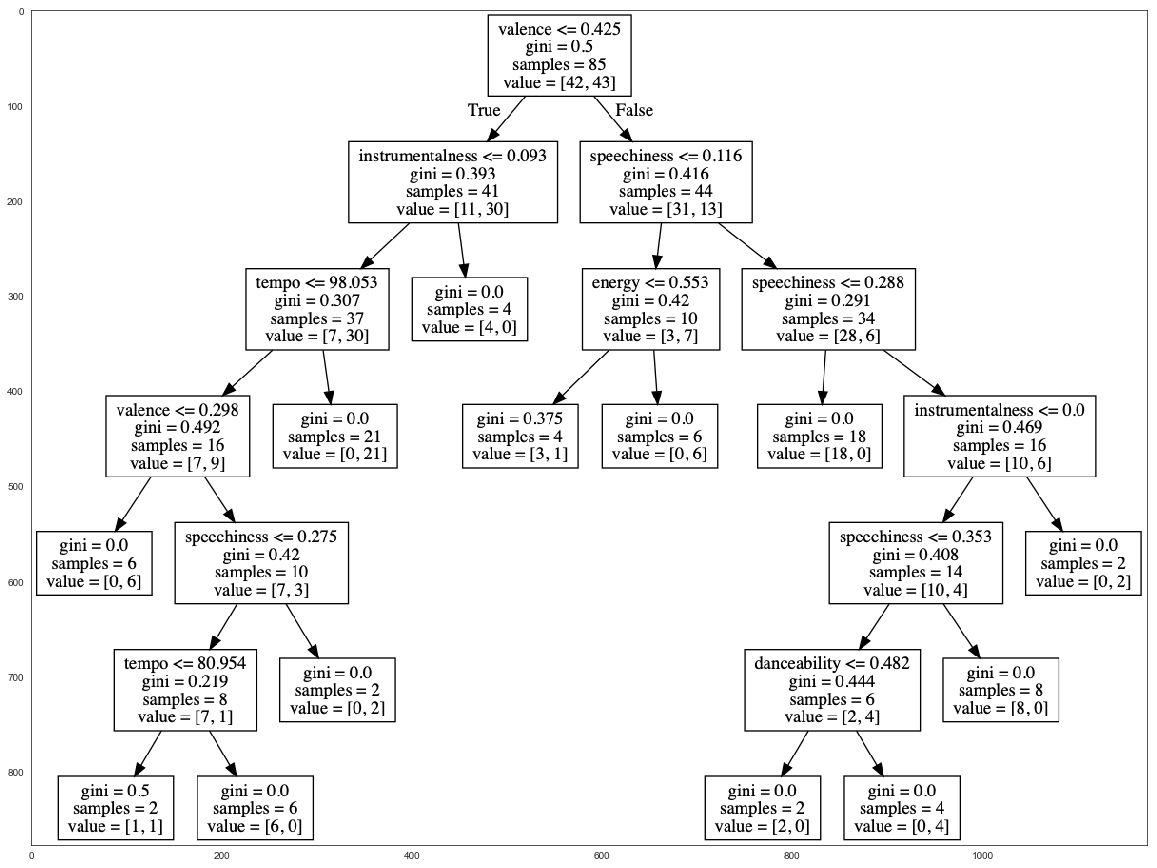

In [69]:
show_tree(decision_tree, features, "tree2.png")

In [70]:
y_pred = classifier.predict(x_test)

In [71]:
print(y_pred)

[0 1 1 0 1 0 0 0 0 1 1 1 1 1 1]


In [72]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)*100
print(score)

40.0


In [73]:
from sklearn.metrics import precision_score

score = precision_score(y_test,y_pred)*100
print(score)

33.33333333333333


In [74]:
import pandas as pd
spotify.trace=False 
drake = spotify.user_playlist("wazowshki", "spotify:user:wazowshki:playlist:3iunes5yeAXCs2ocqyGHGQ")
d_songs = drake["tracks"]["items"] 
d_ids = [] 
for i in range(len(d_songs)): 
    d_ids.append(d_songs[i]["track"]["id"]) 
d_features = spotify.audio_features(d_ids) 
drake_data = pd.DataFrame(d_features)

In [77]:
drake_train, drake_test = train_test_split(drake_data, test_size=1)

In [78]:
drake_pred = classifier.predict(drake_data[features])

In [79]:
print(drake_pred)

[1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1]


In [80]:
def percent_ye(pred):
    num_old = 0
    num_new = 0
    for val in pred:
        if val == 0:
            num_old += 1
        else:
            num_new += 1
    p_old = (num_old / len(pred))*100
    p_new = (num_new / len(pred)) *100
    print("This data is " + str(p_old)+"% old Kanye and "+str(p_new)+"% new Kanye")

In [81]:
percent_ye(drake_pred)

This data is 28.000000000000004% old Kanye and 72.0% new Kanye
